In [1]:
import matplotlib.pyplot as plt
import numpy as np
import starry

np.random.seed(12)
starry.config.lazy = False
starry.config.quiet = True

In [2]:
map = starry.Map(ydeg=5)
map.add_spot(amp=-0.075, sigma=0.1, lat=0, lon=-30)
A_y = np.array(map.y[1:])


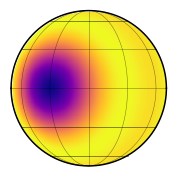

In [3]:
map.show()

In [4]:
map.reset()
map.add_spot(amp=-0.075, sigma=0.1, lat=-30, lon=60)
B_y = np.array(map.y[1:])

In [5]:
A = dict(
    ydeg=5,  # degree of the map
    udeg=2,  # degree of the limb darkening
    inc=80.0,  # inclination in degrees
    amp=1.0,  # amplitude (a value prop. to luminosity)
    r=1.0,  #  radius in R_sun
    m=1.0,  # mass in M_sun
    prot=1.25,  # rotational period in days
    u=[0.40, 0.25],  # limb darkening coefficients
    y=A_y,  # the spherical harmonic coefficients
)

B = dict(
    ydeg=5,  # degree of the map
    udeg=2,  # degree of the limb darkening
    inc=80.0,  # inclination in degrees
    amp=0.1,  # amplitude (a value prop. to luminosity)
    r=0.7,  #  radius in R_sun
    m=0.7,  #  mass in M_sun
    porb=1.00,  # orbital period in days
    prot=0.625,  # rotational period in days
    t0=0.15,  # reference time in days (when it transits A)
    u=[0.20, 0.05],  # limb darkening coefficients
    y=B_y,  # the spherical harmonic coefficients
)

In [6]:
pri = starry.Primary(
    starry.Map(ydeg=A["ydeg"], udeg=A["udeg"], inc=A["inc"], amp=A["amp"]),
    r=A["r"],
    m=A["m"],
    prot=A["prot"],
)
pri.map[1:] = A["u"]
pri.map[1:, :] = A["y"]
pri.map.show(theta=np.linspace(0, 360, 50))

In [7]:
sec = starry.Secondary(
    starry.Map(ydeg=B["ydeg"], udeg=B["udeg"], inc=B["inc"], amp=B["amp"]),
    r=B["r"],
    m=B["m"],
    porb=B["porb"],
    prot=B["prot"],
    t0=B["t0"],
    inc=B["inc"],
)
sec.map[1:] = B["u"]
sec.map[1:, :] = B["y"]
sec.map.show(theta=np.linspace(0, 360, 50))

In [8]:
sys = starry.System(pri, sec)

In [9]:
starry.System?

Init signature:
starry.System(
    primary,
    *secondaries,
    time_unit=Unit("d"),
    light_delay=False,
    texp=None,
    oversample=7,
    order=0,
)
Docstring:     
A system of bodies in Keplerian orbits about a central primary body.

Args:
    primary (:py:class:`Primary`): The central body.
    secondaries (:py:class:`Secondary`): One or more secondary bodies
        in orbit about the primary.
    time_unit (optional): An ``astropy.units`` unit defining the
        time metric for this object. Defaults to
        :py:attr:`astropy.units.day.`
    light_delay (bool, optional): Account for the light travel time
        delay to the barycenter of the system? Default is False.
    texp (scalar): The exposure time of each observation. This can be a
        scalar or a tensor with the same shape as ``t``. If ``texp`` is
        provided, ``t`` is assumed to indicate the timestamp at the middle
        of an exposure of length ``texp``.
    oversample (int): The number of function